# Regression from ch 4

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pymc3 as pm
import pandas as pd

%matplotlib inline
sns.set(font_scale=1.5)

Text(0.5, 0, '$y$')

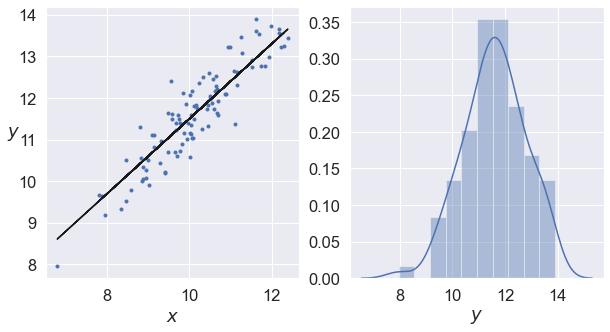

In [4]:
np.random.seed(314)
N = 100
alfa_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)
x = np.random.normal(10, 1, N)
y_real = alfa_real + beta_real * x
y = y_real + eps_real
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y, 'b.')
plt.xlabel('$x$', )
plt.ylabel('$y$', rotation=0)
plt.plot(x, y_real, 'k')
plt.subplot(1,2,2)
sns.distplot(y)
plt.xlabel('$y$')

In [5]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    #mu = pm.Deterministic('mu', alpha + beta * x)
    #y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    y_pred = pm.Normal('y_pred', mu= alpha + beta * x, sd=epsilon, observed=y)
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, chains=2)

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:05<00:00, 3780.18draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


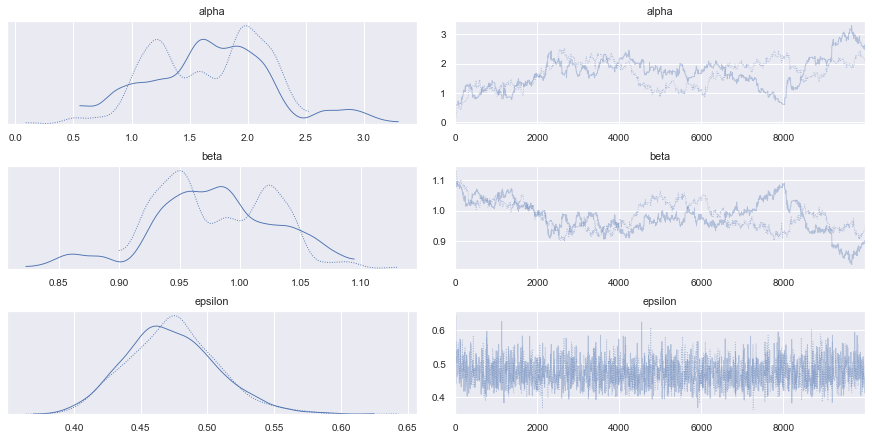

In [6]:
pm.traceplot(trace, compact=True);

### This slow wandering in alpha and beta shows an issue!

In [8]:
pm.summary(trace, var_names=['alpha', 'beta', 'epsilon'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,1.669,0.504,0.641,2.435,0.119,0.086,18.0,18.0,19.0,18.0,1.02
beta,0.981,0.049,0.908,1.084,0.012,0.008,18.0,18.0,19.0,19.0,1.02
epsilon,0.474,0.034,0.411,0.536,0.001,0.001,1336.0,1328.0,1356.0,1851.0,1.00


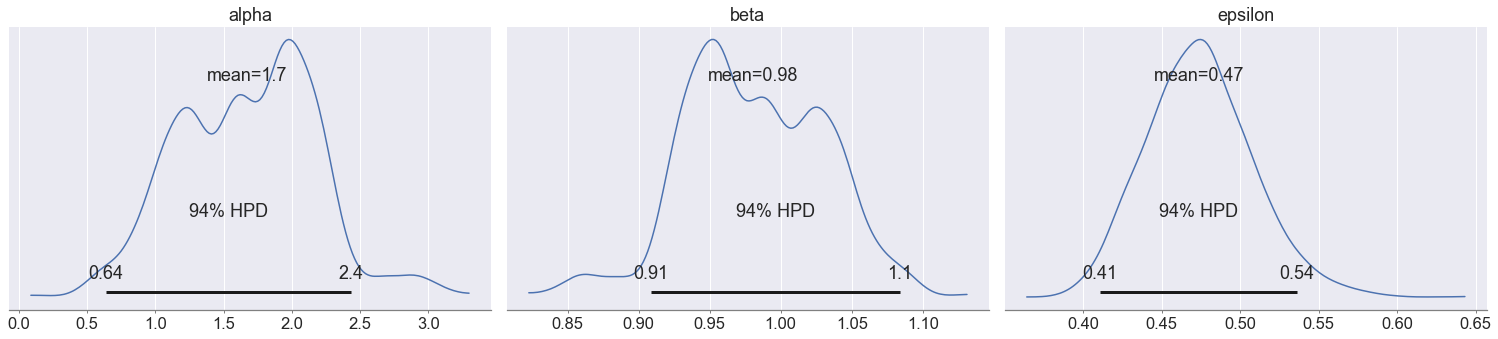

In [9]:
pm.plot_posterior(trace, var_names=['alpha', 'beta', 'epsilon']);

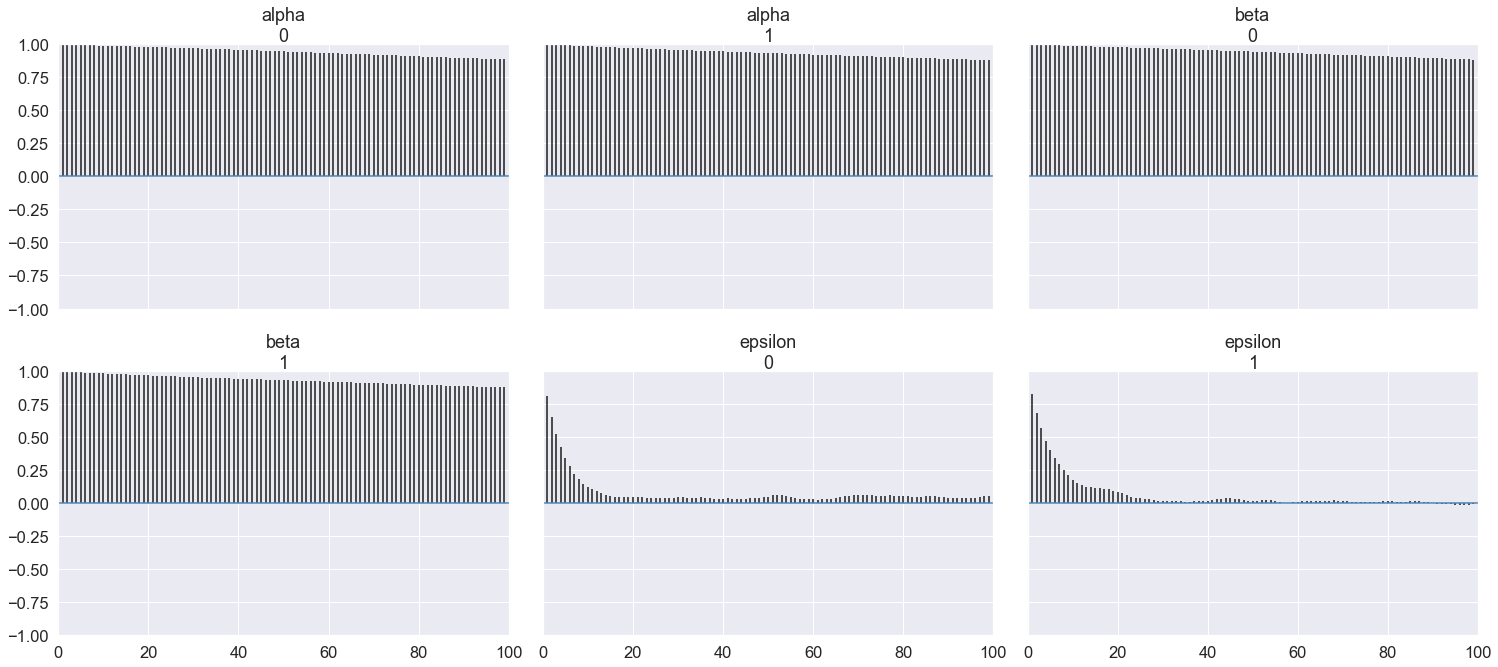

In [10]:
pm.autocorrplot(trace, var_names=['alpha', 'beta', 'epsilon']);

Text(0, 0.5, '$\\beta$')

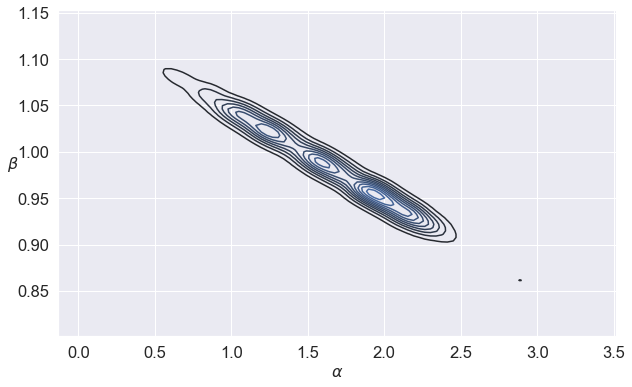

In [11]:
plt.figure(figsize=(10,6))
sns.kdeplot(trace['alpha'], trace['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)

## Does NUTS do better?

In [12]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    #mu = pm.Deterministic('mu', alpha + beta * x)
    #y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    y_pred = pm.Normal('y_pred', mu= alpha + beta * x, sd=epsilon, observed=y)
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, chains=2)

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:05<00:00, 3873.19draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


### No!

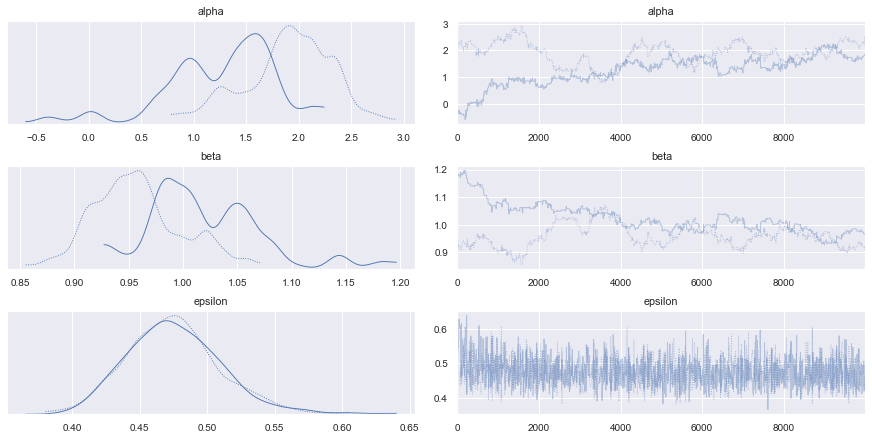

In [13]:
pm.traceplot(trace, compact=True);

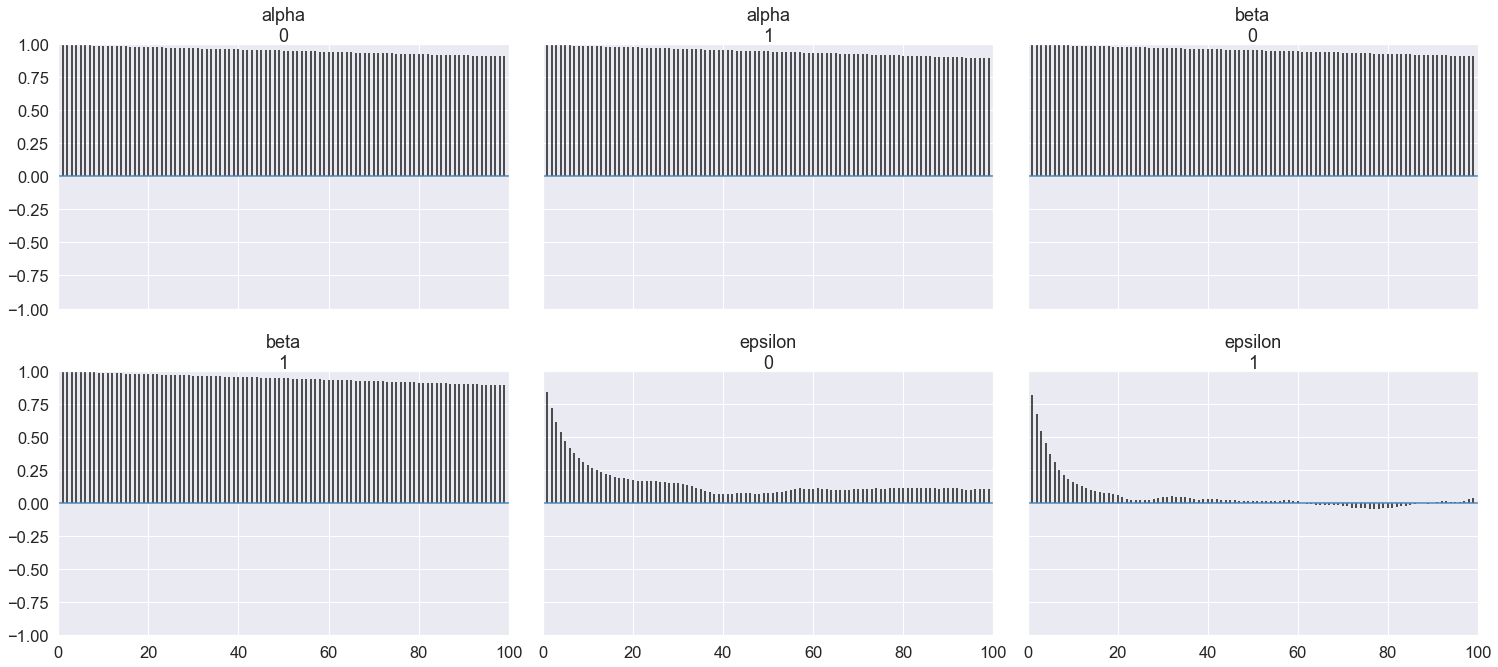

In [14]:
pm.autocorrplot(trace, var_names=['alpha', 'beta', 'epsilon']);

Text(0, 0.5, '$\\beta$')

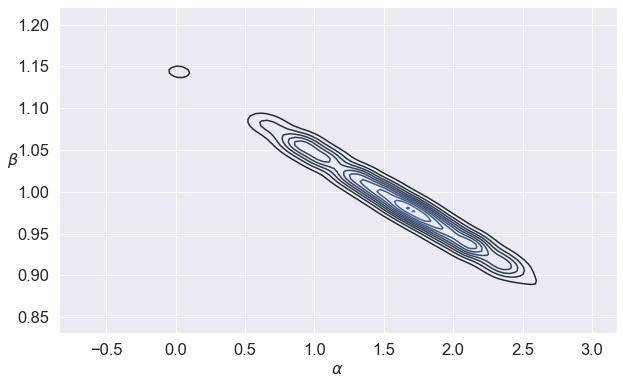

In [15]:
plt.figure(figsize=(10,6))
sns.kdeplot(trace['alpha'], trace['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)

### Try subtracting the mean

In [16]:
xmean = np.mean(x)
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    #mu = pm.Deterministic('mu', alpha + beta * x)
    #y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    y_pred = pm.Normal('y_pred', mu= alpha + beta * (x-xmean), sd=epsilon, observed=y)
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, chains=2)

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:05<00:00, 3918.58draws/s]
The number of effective samples is smaller than 10% for some parameters.


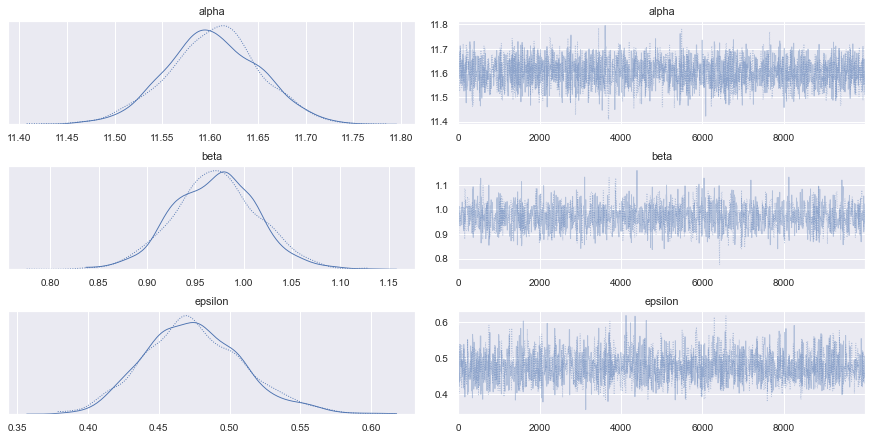

In [17]:
pm.traceplot(trace, compact=True);

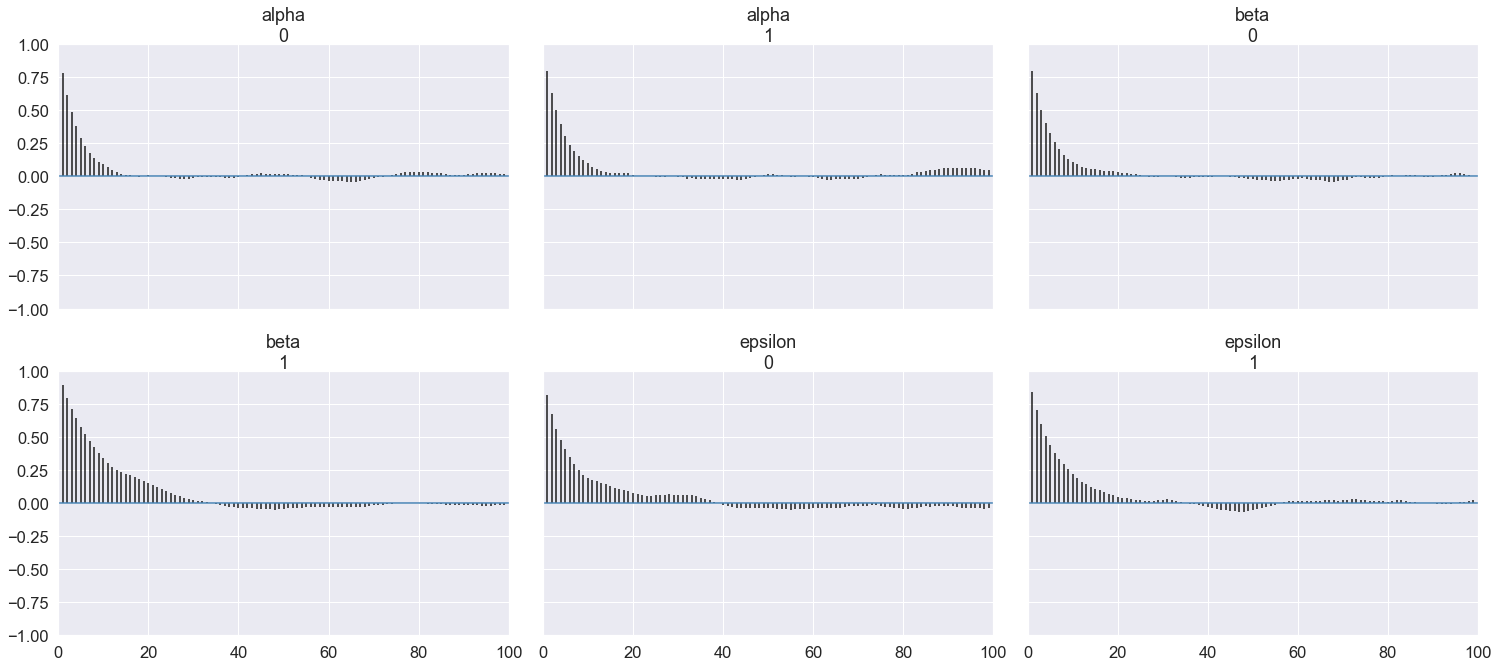

In [18]:
pm.autocorrplot(trace, var_names=['alpha', 'beta', 'epsilon']);

Text(0, 0.5, '$\\beta$')

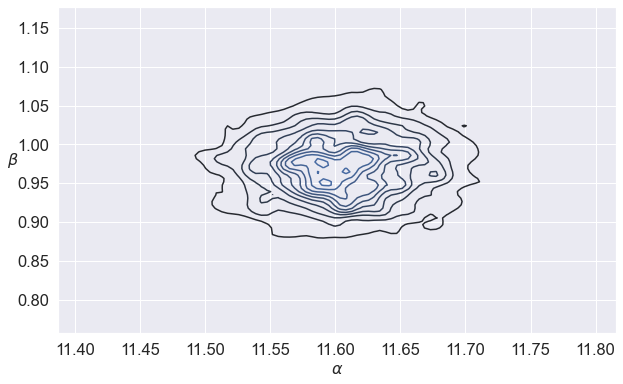

In [19]:
plt.figure(figsize=(10,6))
sns.kdeplot(trace['alpha'], trace['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)

No handles with labels found to put in legend.


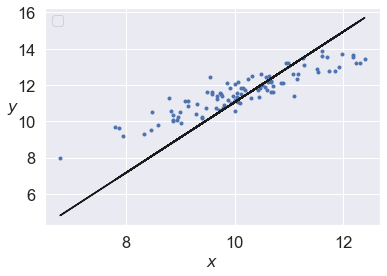

In [20]:
## TODO Sort this out!

plt.plot(x, y, 'b.');
alpha_m = trace['alpha'].mean()
beta_m = trace['beta'].mean()
alpha = alpha_m+beta_m*x
plt.plot(x, alpha + beta_m * (x - xmean) - xmean, c='k', ) #label='y = {:.2f} + {:.2f} * x'.format(alpha, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)

# Look to problmatic data sets
page 114+


In [21]:
ans = sns.load_dataset('anscombe')
x_3 = ans[ans.dataset == 'III']['x'].values
y_3 = ans[ans.dataset == 'III']['y'].values

In [22]:
X = np.arange(10)+np.random.normal(0, .1, size=10)
Y = 5*X + 10 + np.random.normal(0, 3, size=10)
Y[7] += 50

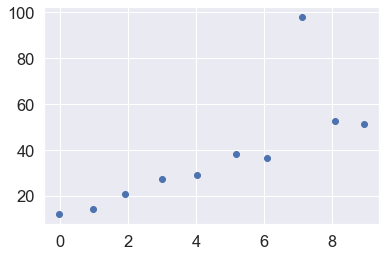

In [23]:
plt.scatter(X,Y)

In [24]:
data = pd.DataFrame({'x':X, 'y':Y})
with pm.Model() as model:
    glm_n = pm.glm.GLM.from_formula('y ~ x', data)
    trace_n = pm.sample(2000) # draw 2000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:04<00:00, 2033.19draws/s]


In [25]:
glm_n

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd891fa6b50>,
      dtype=object)

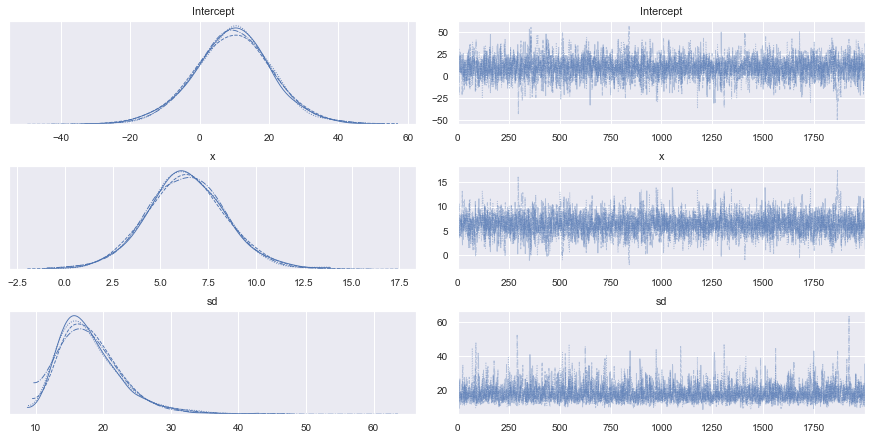

In [26]:
pm.traceplot(trace_n)

In [27]:
ppc_n = pm.sample_posterior_predictive(trace_n, samples=500, model=model, )


/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 500/500 [00:01<00:00, 370.71it/s]


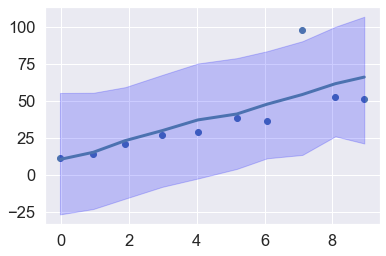

In [28]:
plt.scatter(X,Y)
perc_n = np.percentile(ppc_n['y'], [2.5, 97.5, 50], axis=0)
plt.fill_between(X, perc_n[0], perc_n[1], color='blue', alpha=0.2)
plt.plot(X, perc_n[2], lw=3)

In [29]:
data = pd.DataFrame({'x':X, 'y':Y})
with pm.Model() as model:
    glm_t = pm.glm.GLM.from_formula('y ~ x', data, family=pm.families.StudentT())
    step = pm.Metropolis()
#     step = pm.NUTS()
    trace_t = pm.sample(10000, step=step, tune=5000) # draw 2000 posterior samples using NUTS sampling

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [lam]
>Metropolis: [x]
>Metropolis: [Intercept]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:13<00:00, 4391.11draws/s]
The number of effective samples is smaller than 10% for some parameters.


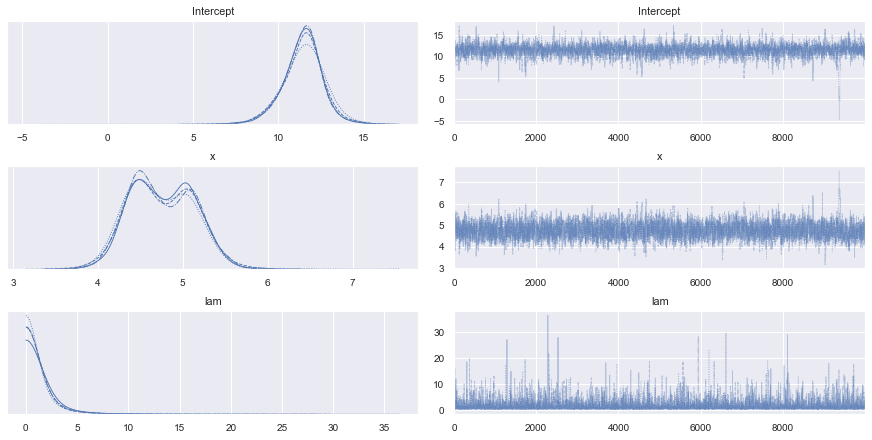

In [30]:
pm.traceplot(trace_t);

In [31]:
pm.summary(trace_t)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,11.429,1.181,9.134,13.483,0.027,0.019,1986.0,1986.0,2312.0,3199.0,1.0
x,4.756,0.377,4.114,5.391,0.008,0.006,2264.0,2187.0,2325.0,3270.0,1.0
lam,1.305,1.688,0.022,3.925,0.021,0.015,6544.0,6544.0,5239.0,6054.0,1.0


In [32]:
glm_t

/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [00:01<00:00, 853.57it/s]


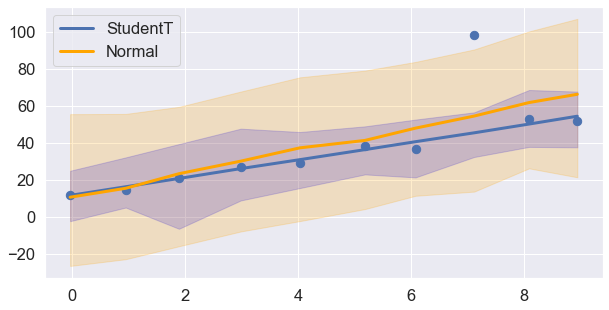

In [33]:
fig, ax = plt.subplots(figsize=(10,5))

ppc_t = pm.sample_posterior_predictive(trace_t, samples=1000, model=model, )
perc_t = np.percentile(ppc_t['y'], [2.5, 97.5, 50], axis=0)
plt.fill_between(X, perc_t[0], perc_t[1], color='blue', alpha=0.2)
plt.fill_between(X, perc_n[0], perc_n[1], color='orange', alpha=0.2)

plt.plot(X, perc_t[2], lw=3, label='StudentT')
plt.plot(X, perc_n[2], lw=3, label='Normal', color='orange')
plt.scatter(X,Y, s=70)
plt.legend(loc='upper left')

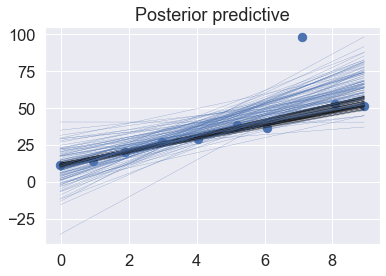

In [34]:
pm.plot_posterior_predictive_glm(trace_t, eval=X, samples=100)
pm.plot_posterior_predictive_glm(trace_n, eval=X, samples=100, color='b')

plt.scatter(X,Y, s=70)


# Hierarchical linear regression
page 117

In [35]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(60, 10, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))
y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real

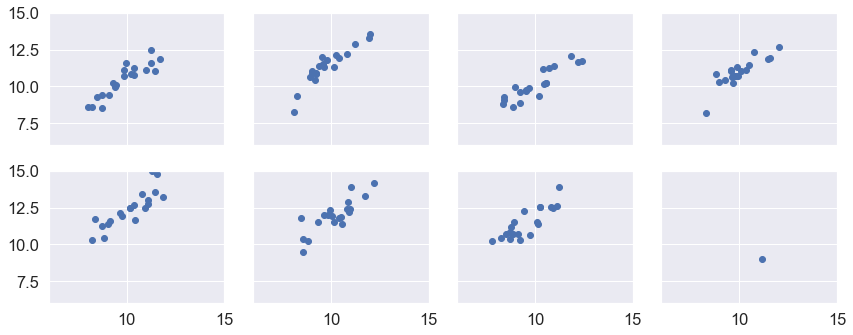

In [46]:
fig, ax = plt.subplots(2, 4, figsize=(12,5), sharex=True, sharey=True)
ax = ax.flatten()
j, k = 0, N
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
#     ax[i].set_xlim(6, 15)
#     ax[i].set_ylim(7, 17)
    j += N
    k += N
ax[0].set_xlim((6,15))
ax[0].set_ylim((6,15))

plt.tight_layout()

In [47]:
# center the data
x_centered = x_m - x_m.mean()

First we are going to fit a non-hierarchical model, just as we have already seen. The
only difference is that now we are going to include code to re-scale alpha to the
original scale.

In [49]:
with pm.Model() as unpooled_model:
    alpha_tmp = pm.Normal('alpha_tmp', mu=0, sd=10, shape=M)
    beta = pm.Normal('beta', mu=0, sd=10, shape=M)
    epsilon = pm.HalfCauchy('epsilon', 5)
    nu = pm.Exponential('nu', 1/30)
    y_pred = pm.StudentT('y_pred', mu=alpha_tmp[idx] + beta[idx] * x_centered, sd=epsilon, nu=nu, observed=y_m)
    alpha = pm.Deterministic('alpha', alpha_tmp - beta * x_m.mean())
    step = pm.NUTS(scaling=start)
    trace_up = pm.sample(2000, step=step)
    

INFO (theano.gof.compilelock): Refreshing lock /Users/balarsen/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, epsilon, beta, alpha_tmp]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:08<00:00, 1147.40draws/s]
The number of effective samples is smaller than 10% for some parameters.


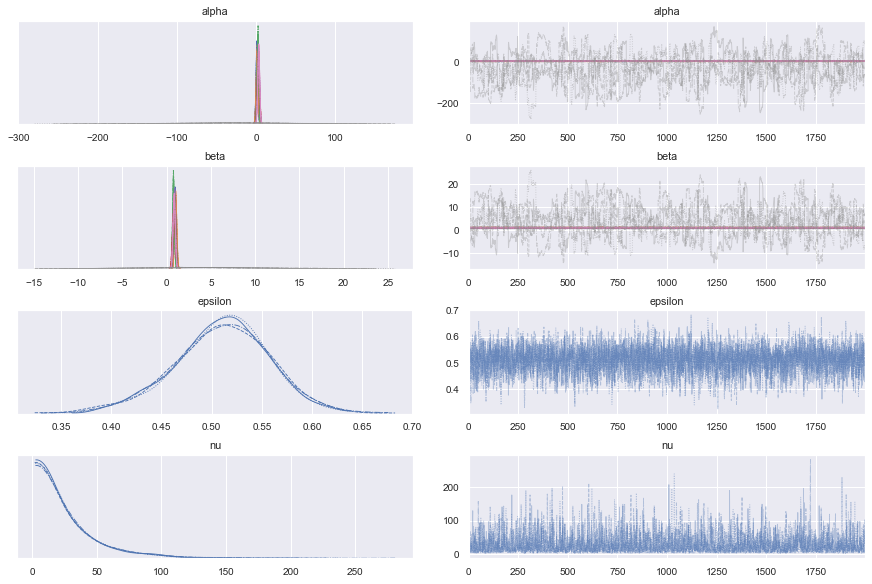

In [50]:
varnames=['alpha', 'beta', 'epsilon', 'nu']
pm.traceplot(trace_up, varnames);

In [53]:
with pm.Model() as hierarchical_model:
    alpha_tmp_mu = pm.Normal('alpha_tmp_mu', mu=0, sd=10)
    alpha_tmp_sd = pm.HalfNormal('alpha_tmp_sd', 10)
    beta_mu = pm.Normal('beta_mu', mu=0, sd=10)
    beta_sd = pm.HalfNormal('beta_sd', sd=10)
    alpha_tmp = pm.Normal('alpha_tmp', mu=alpha_tmp_mu, sd=alpha_tmp_sd, shape=M)
    beta = pm.Normal('beta', mu=beta_mu, sd=beta_sd, shape=M)
    epsilon = pm.HalfCauchy('epsilon', 5)
    nu = pm.Exponential('nu', 1/30)
    y_pred = pm.StudentT('y_pred', mu=alpha_tmp[idx] + beta[idx] *
    x_centered, sd=epsilon, nu=nu, observed=y_m)
    alpha = pm.Deterministic('alpha', alpha_tmp - beta * x_m.
    mean())
    alpha_mu = pm.Deterministic('alpha_mu', alpha_tmp_mu - beta_mu
    * x_m.mean())
    alpha_sd = pm.Deterministic('alpha_sd', alpha_tmp_sd - beta_mu
    * x_m.mean())
    mu, sds, elbo = pm.variational.ADVI(n=100000, verbose=False)
    cov_scal = np.power(hierarchical_model.dict_to_array(sds), 2)
    step = pm.NUTS(scaling=cov_scal, is_cov=True)
    trace_hm = pm.sample(1000, step=step, start=mu)

TypeError: cannot unpack non-iterable ADVI object